# ParkingBirmingham
## dataDetect.py
#### observe data set

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import datetime
import pandas.plotting._converter as pandacnv
pandacnv.register()

In [2]:
df = pd.read_csv('ParkingBirminghamDataSet.csv')
timeStamp = pd.to_datetime(df['LastUpdated'].str.split().str[0])
print("Time range: ", timeStamp.min().date(), " - ", timeStamp.max().date())

Time range:  2016-10-04  -  2016-12-19


In [3]:
carparks_code = df['SystemCodeNumber'].unique()
print("Unique Car Park Code list:")
carparks_code

Unique Car Park Code list:


array(['BHMBCCMKT01', 'BHMBCCPST01', 'BHMBCCSNH01', 'BHMBCCTHL01',
       'BHMBRCBRG01', 'BHMBRCBRG02', 'BHMBRCBRG03', 'BHMBRTARC01',
       'BHMEURBRD01', 'BHMEURBRD02', 'BHMMBMMBX01', 'BHMNCPHST01',
       'BHMNCPLDH01', 'BHMNCPNHS01', 'BHMNCPNST01', 'BHMNCPPLS01',
       'BHMNCPRAN01', 'Broad Street', 'Bull Ring', 'NIA Car Parks',
       'NIA North', 'NIA South', 'Others-CCCPS105a', 'Others-CCCPS119a',
       'Others-CCCPS133', 'Others-CCCPS135a', 'Others-CCCPS202',
       'Others-CCCPS8', 'Others-CCCPS98', 'Shopping'], dtype=object)

In [4]:
print("Total number of unique Car Park Code: " + str(len(carparks_code)))

Total number of unique Car Park Code: 30


In [5]:
minDate = timeStamp.min().date()
maxDate = timeStamp.max().date()

In [6]:
timeTicks = pd.date_range(minDate, maxDate, freq = 'W-MON')
timeTicks

DatetimeIndex(['2016-10-10', '2016-10-17', '2016-10-24', '2016-10-31',
               '2016-11-07', '2016-11-14', '2016-11-21', '2016-11-28',
               '2016-12-05', '2016-12-12', '2016-12-19'],
              dtype='datetime64[ns]', freq='W-MON')

<Figure size 432x288 with 0 Axes>

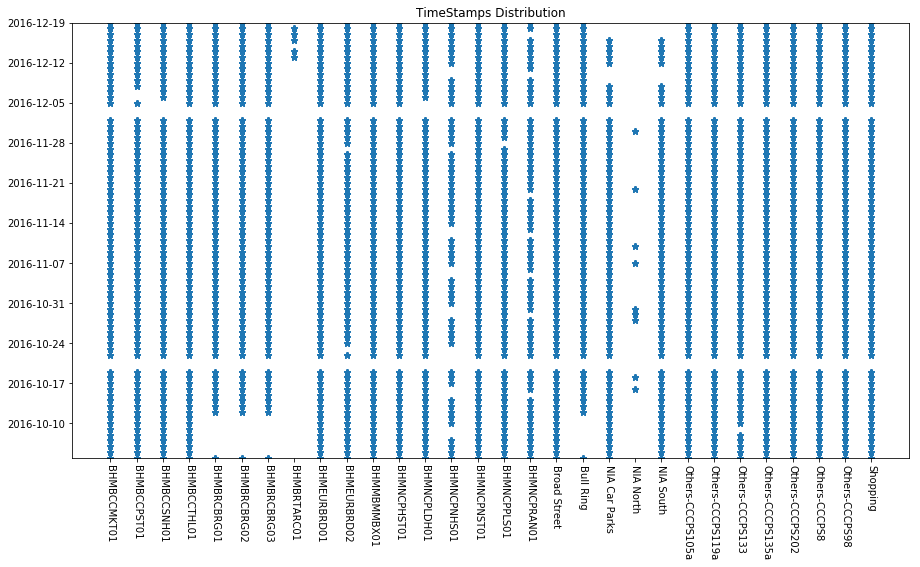

In [7]:
plt.figure('TimeStamp Distribution')
plt.figure(figsize=(15,8))
plt.scatter(df['SystemCodeNumber'], timeStamp, marker='*')
plt.xticks(rotation = 270)
plt.ylim((minDate, maxDate))
plt.gca().yaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))
plt.yticks(pd.date_range(minDate,maxDate,freq = 'W-MON'))
plt.title('TimeStamps Distribution')
plt.show()

In [8]:
# general missing records on Oct. 20, Oct. 21 and Dec.3, Dec 4.
# large scale missing records especially for BHMBRTARC01 and NIA North.

In [9]:
# get time information
def getTimeInfo(time):
    # get month, day and year
    time = time.split('/')
    month = int(time[0])
    day = int(time[1])
    year = int(time[2][:4])
    
    # get hour and minute
    clock = time[2][5:].split(':')
    hour = int(clock[0])
    minute = int(clock[1])
 
    # the first recording date is 10/4/2016, so we can get the date index
    day_idx = (datetime.datetime(2016, month, day) - datetime.datetime(2016, 10, 4)).days + 1
    minutes = hour * 60 + minute - 450
    daytime_idx = ( minutes ) // 60 * 2 + ( minutes % 60 ) // 20     
    total_idx = (day_idx - 1) * 18 + daytime_idx
    
    return np.array([year, month, day, hour, minute, day_idx, daytime_idx, total_idx])

In [10]:
times = df['LastUpdated'].values
times_info = [getTimeInfo(time) for time in times]
times_info = np.array(times_info)
times_info

array([[2016,   10,    4, ...,    1,    1,    1],
       [2016,   10,    4, ...,    1,    2,    2],
       [2016,   10,    4, ...,    1,    3,    3],
       ...,
       [2016,   12,   19, ...,   77,   16, 1384],
       [2016,   12,   19, ...,   77,   17, 1385],
       [2016,   12,   19, ...,   77,   18, 1386]])

In [11]:
## create time_info.cvs
# times_info_df = pd.DataFrame(times_info, columns = ['year', 'month', 'day', 'hour', 'minute', 'day_idx', 'daytime_idx', 'total_idx'])
# times_info_csv = times_info_df.to_csv(r'C:\Users\Euterpe\Desktop\PyProject\ParkingBirmingham\times_info.csv', index = None, header = True)

In [12]:
print( 'Total Records: ', len(df))

Total Records:  35717


In [13]:
print( 'Total Days: ', (datetime.datetime(2016, 12, 19) - datetime.datetime(2016, 10, 4)).days + 1)

Total Days:  77


In [14]:
# record number of records for each car park
numberOfRecords = []
print('CarParkCode TotalRecords Capacity')
for carpark_code in carparks_code:
    curCarPark = df[df['SystemCodeNumber'] == carpark_code]
    print(carpark_code, len(curCarPark), curCarPark['Capacity'].unique())
    numberOfRecords.append(len(curCarPark))

CarParkCode TotalRecords Capacity
BHMBCCMKT01 1312 [577]
BHMBCCPST01 1276 [317]
BHMBCCSNH01 1294 [863]
BHMBCCTHL01 1312 [387]
BHMBRCBRG01 1186 [1010]
BHMBRCBRG02 1186 [1194]
BHMBRCBRG03 1186 [849]
BHMBRTARC01 88 [496]
BHMEURBRD01 1312 [470]
BHMEURBRD02 1276 [220]
BHMMBMMBX01 1312 [687]
BHMNCPHST01 1312 [1200]
BHMNCPLDH01 1292 [720]
BHMNCPNHS01 1038 [500]
BHMNCPNST01 1312 [485]
BHMNCPPLS01 1291 [450]
BHMNCPRAN01 1186 [600]
Broad Street 1312 [690]
Bull Ring 1186 [3053]
NIA Car Parks 1204 [1268]
NIA North 162 [480]
NIA South 1204 [788]
Others-CCCPS105a 1312 [2009]
Others-CCCPS119a 1312 [2803]
Others-CCCPS133 1294 [4675]
Others-CCCPS135a 1312 [3883]
Others-CCCPS202 1312 [2937]
Others-CCCPS8 1312 [1322]
Others-CCCPS98 1312 [3103]
Shopping 1312 [1920]


<Figure size 432x288 with 0 Axes>

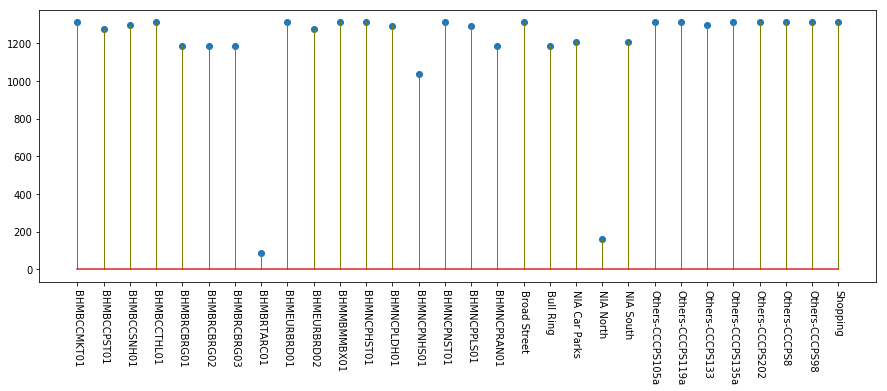

In [15]:
plt.figure('NumberOfRecords')
plt.figure(figsize=(15,5))
xs = range(len(numberOfRecords))
(markers, stemlines, baseline) = plt.stem(xs, numberOfRecords)
plt.setp(stemlines, linestyle = "-", color = "olive", linewidth = 1)
plt.xticks(xs, carparks_code, rotation = 270)
plt.show()

In [16]:
# #########################################################################################
# Summarize
# Total number of unique car park is 30.
# Each car park have 1200 records per day except two.
# The records of "BHMBRTARC01", "NIA North" are obviously less than other car parks.
# #########################################################################################